In [1]:
from glob import glob
fits_image_file = glob('../images/grizli_v2/20mas/*.fits')[-1]
fits_image_file

'../images/grizli_v2/20mas/sunrise-grizli-v2-f410m-clear_20mas_sci.fits'

In [2]:
import numpy as np

In [3]:
#%matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
# https://matplotlib.org/tutorials/introductory/customizing.html
#plt.style.use('/Users/dcoe/p/matplotlibrc.txt')
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import make_lupton_rgb, SqrtStretch, LogStretch, hist, simple_norm

In [4]:
import PIL

In [5]:
PIL.Image.MAX_IMAGE_PIXELS

89478485

In [6]:
PIL.Image.MAX_IMAGE_PIXELS = 933120000  # allow it to load this large image

In [7]:
from PIL import Image, ImageEnhance
color_image_file = 'whl0137.png'
im = Image.open(color_image_file)

In [8]:
im = im.transpose(method=Image.FLIP_TOP_BOTTOM)

/var/folders/y3/vsjr6j554mnfpgy_m1xrnckm0003tz/T/ipykernel_35514/2885088028.py:1: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  im = im.transpose(method=Image.FLIP_TOP_BOTTOM)


In [9]:
color_image = np.asarray(im)

In [10]:
from astropy.io import fits
import astropy.wcs as wcs

hdu = fits.open(fits_image_file)
idata = 0
imwcs = wcs.WCS(hdu[idata].header, hdu)

<IPython.core.display.Javascript object>


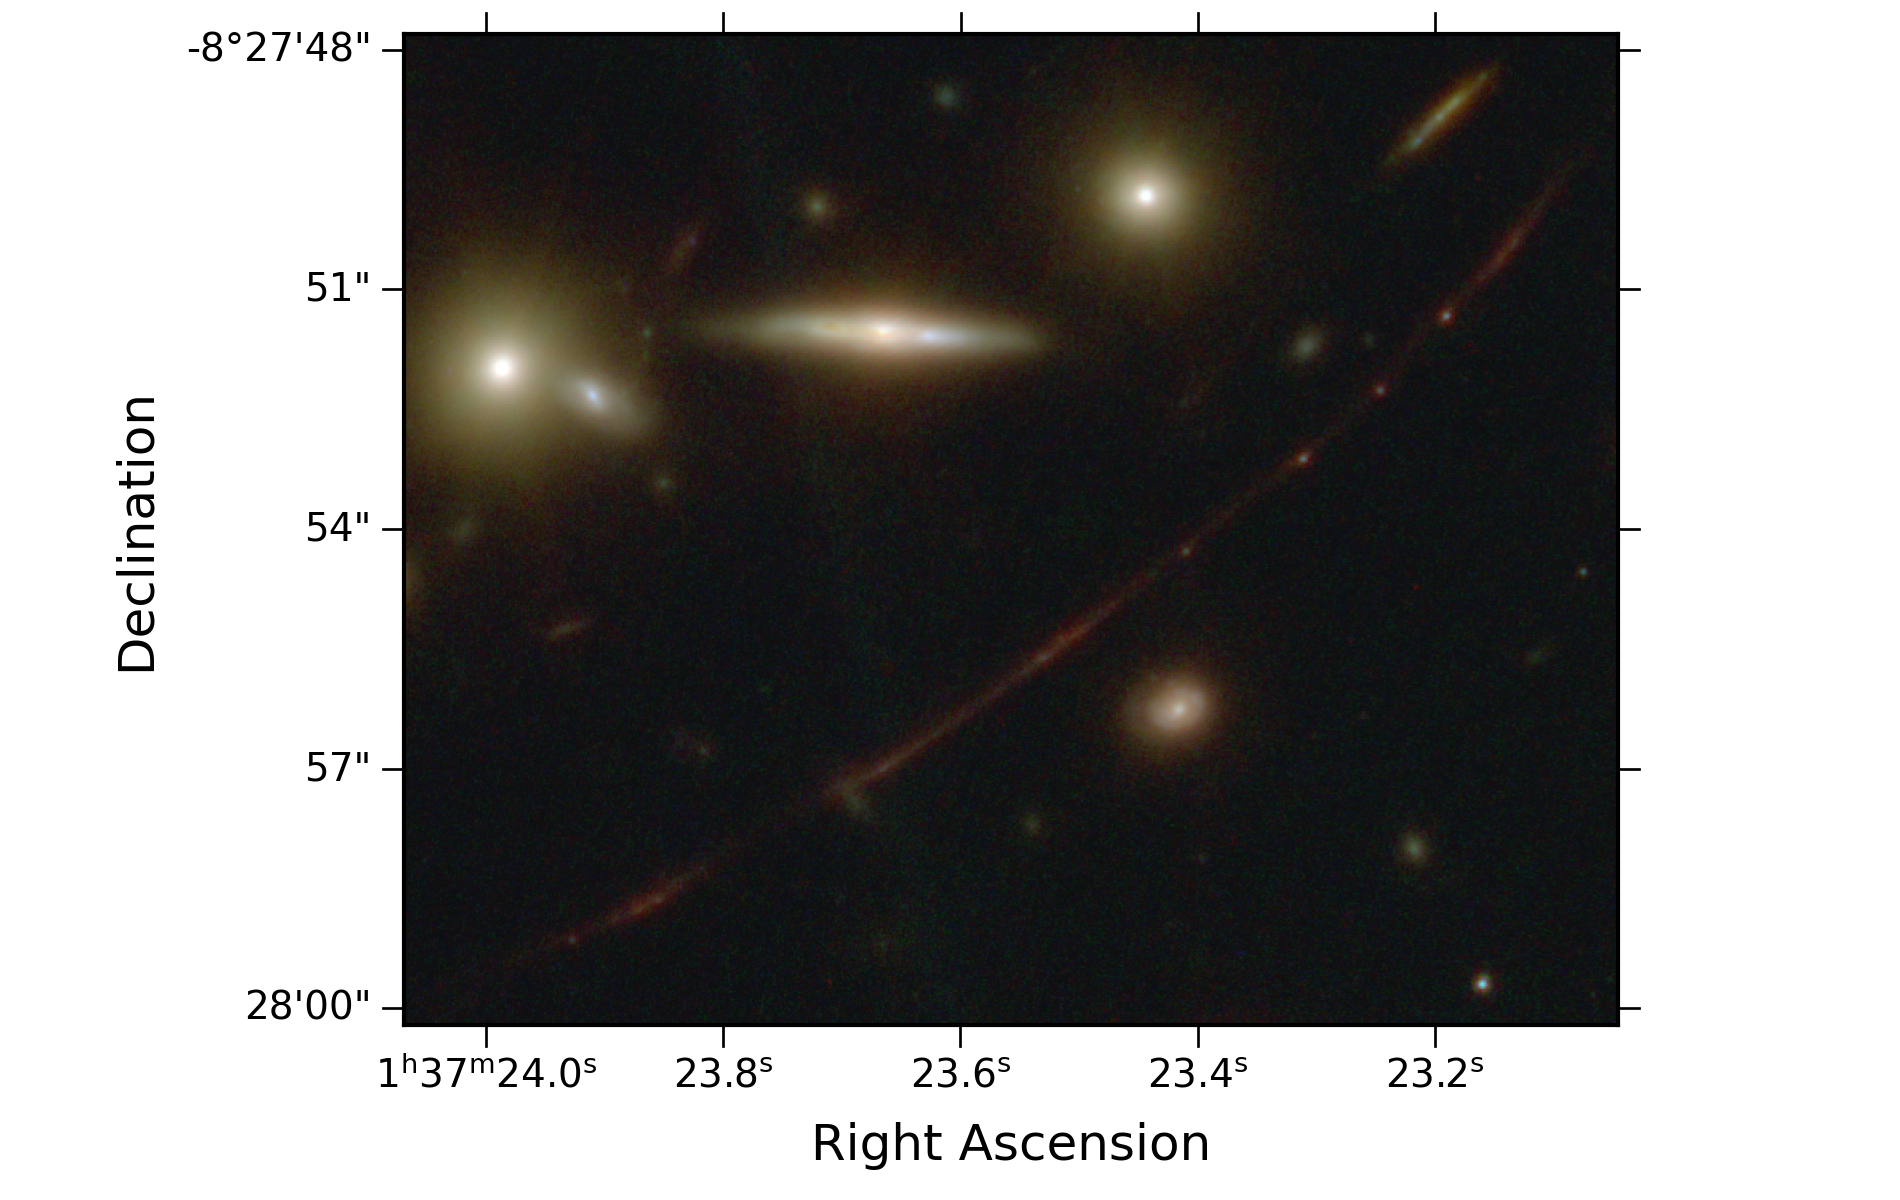

(6135.0, 6755.0)

In [11]:
fig = plt.figure(figsize=(9.5, 6))
ax = fig.add_subplot(1, 1, 1, projection=imwcs) # , sharex=True, sharey=True)
plt.imshow(color_image)#, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.xlim(7980, 8740)
plt.ylim(6135, 6755)

In [12]:
xlo, xhi = 7980, 8740
ylo, yhi = 6135, 6755

In [13]:
slices = slice(ylo, yhi), slice(xlo, xhi)
extent = xlo, xhi, ylo, yhi

In [14]:
def roundint(x):
    return int(np.round(x))

def slices_extent(x, y, dx, dy=0):
    dy = dy or dx
    xlo = roundint(x-dx)
    xhi = roundint(x+dx+1)
    ylo = roundint(y-dy)
    yhi = roundint(y+dy+1)
    xslice = slice(xlo, xhi)
    yslice = slice(ylo, yhi)
    slices = yslice, xslice
    extent = xlo, xhi, ylo, yhi
    return slices, extent

<IPython.core.display.Javascript object>


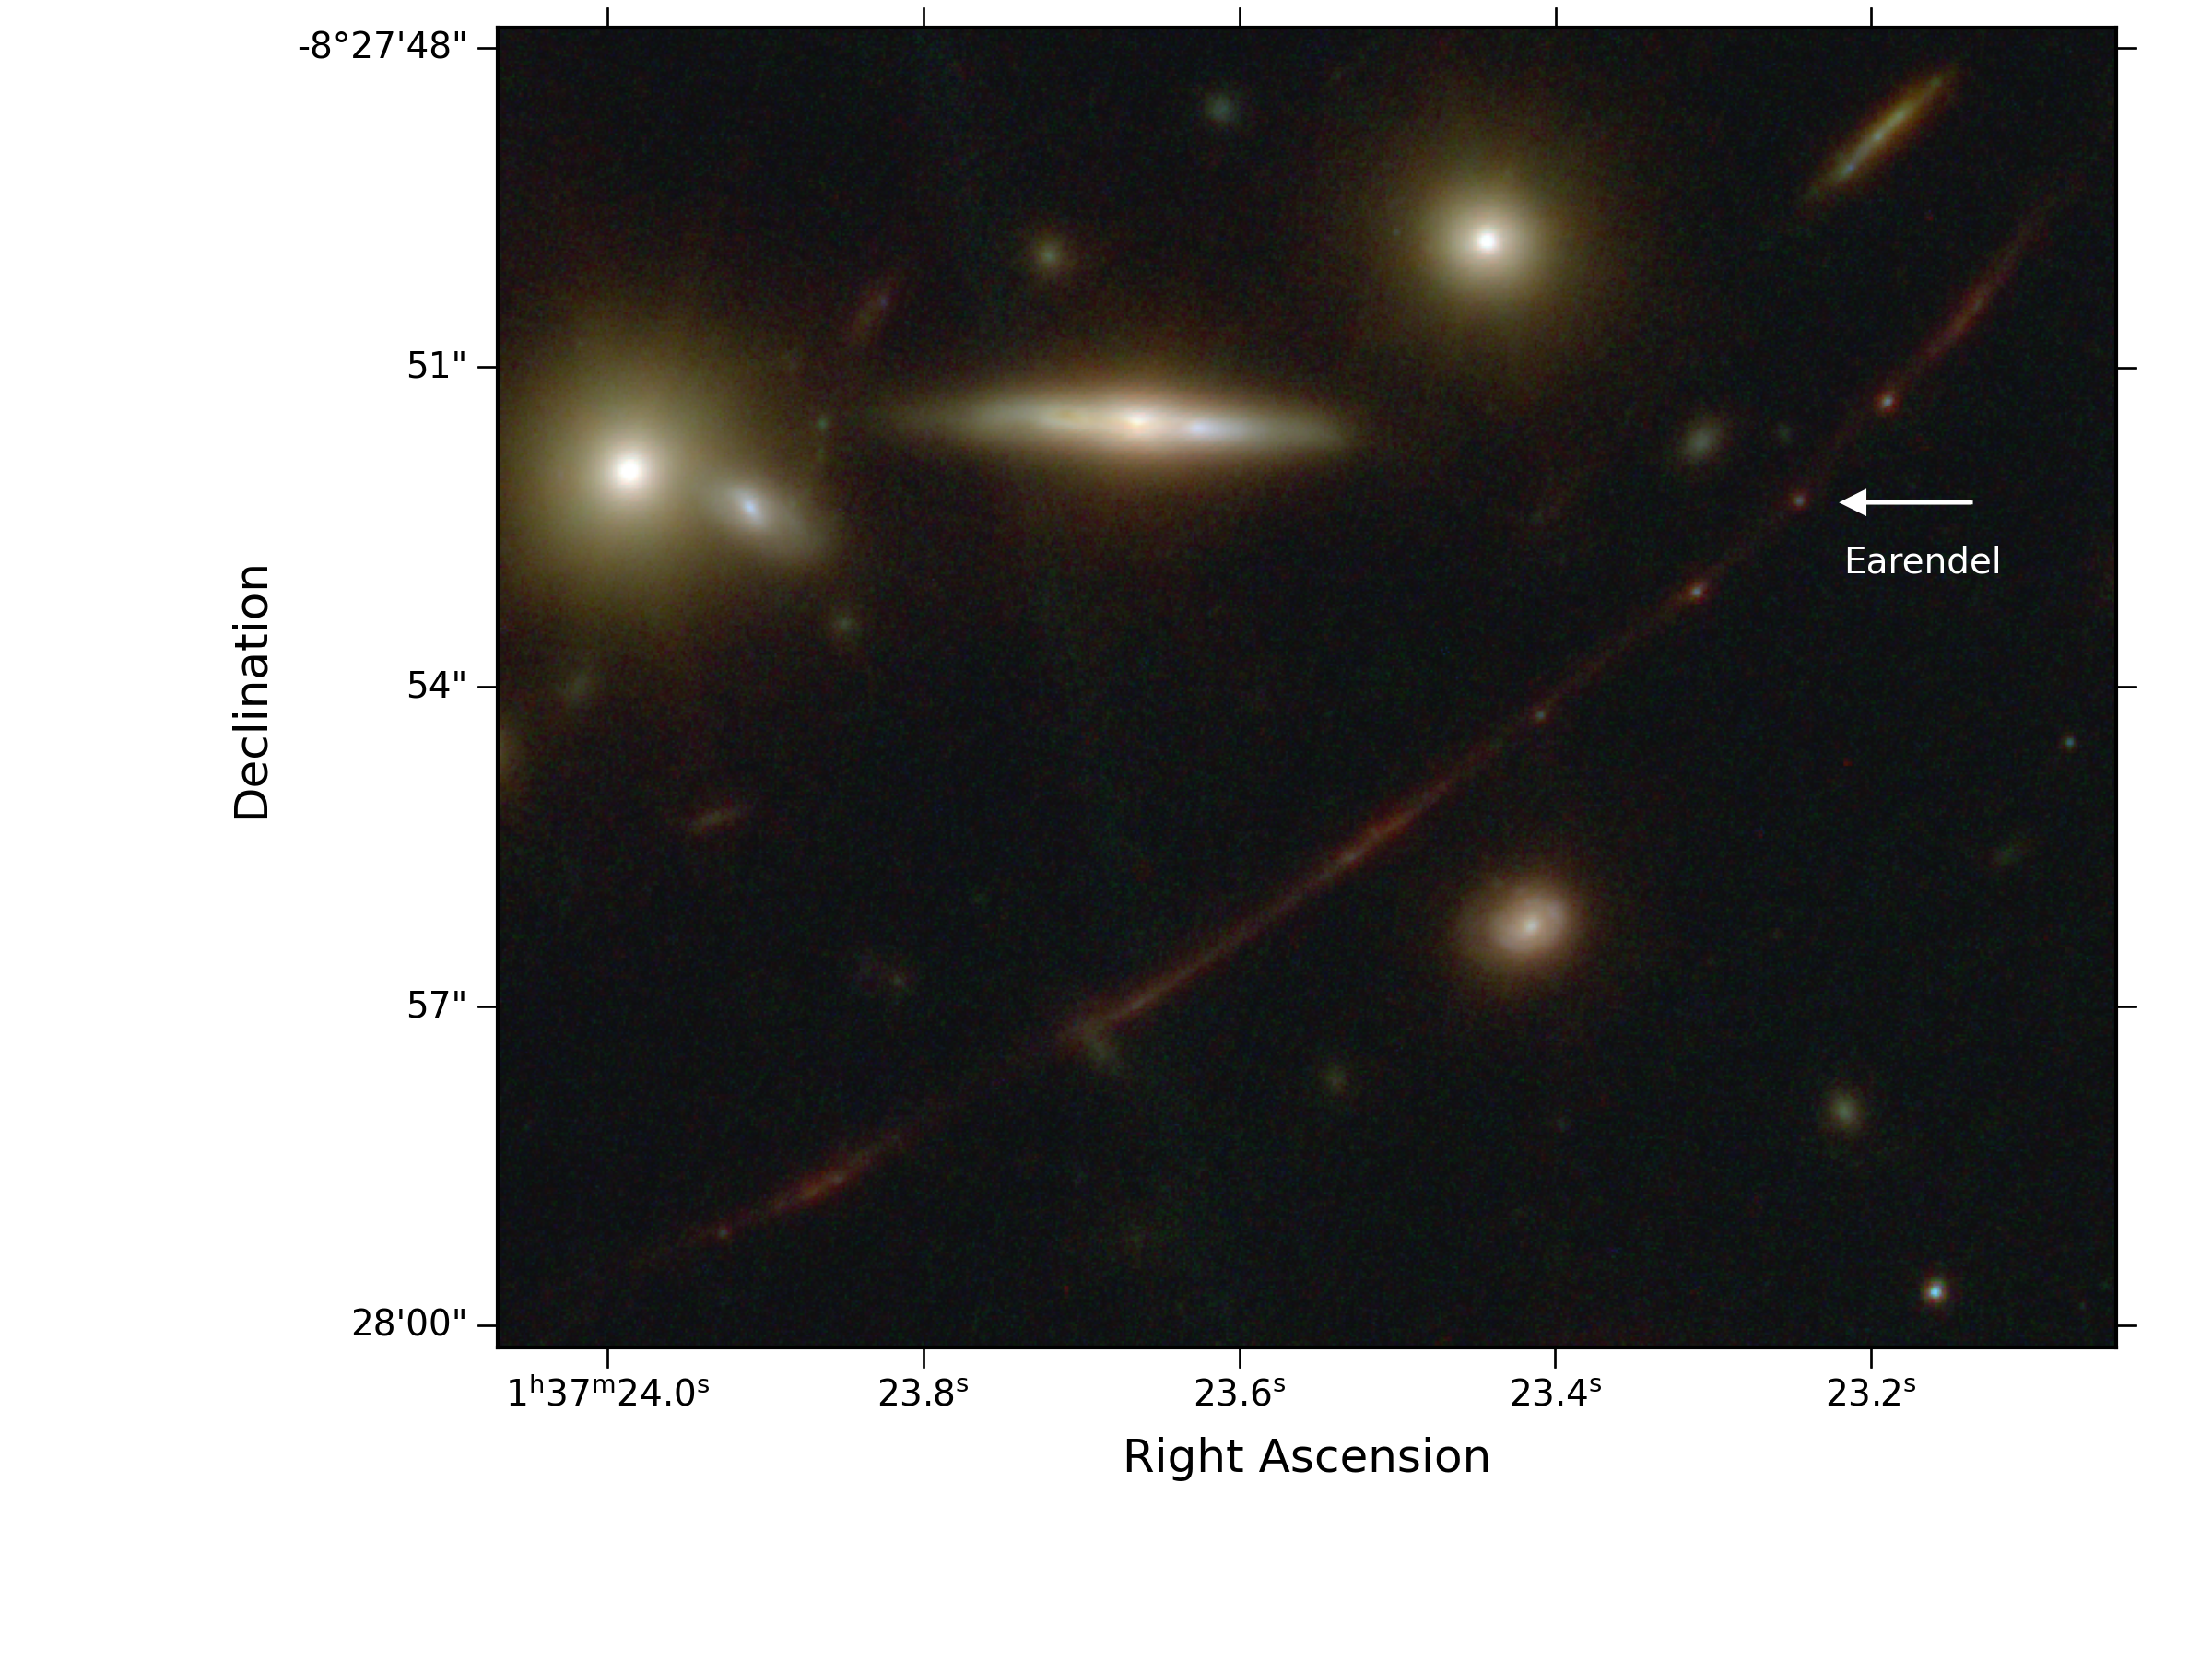

In [15]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1, 1, 1, projection=imwcs) # , sharex=True, sharey=True)
plt.imshow(color_image[slices], extent=extent)#, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')

In [16]:
#plt.savefig('SunriseArc_color.pdf', bbox_inches='tight', dpi=800)

# Add annotations

In [17]:
# https://docs.astropy.org/en/stable/visualization/wcsaxes/overlays.html
ax.set_autoscale_on(False)  # freeze all motor functions

In [18]:
x, y = 8622, 6532
dx, dy = 50, 0
ax.arrow(x+dx, y, -dx, dy, head_width=10, head_length=10, lw=1.5, fc='w', ec='w')
plt.text(x-10, y-33, 'Earendel', fontsize=14, color='w');

In [19]:
plt.show()

In [20]:
plt.savefig('SunriseArc_color.pdf', bbox_inches='tight', dpi=800)

/var/folders/y3/vsjr6j554mnfpgy_m1xrnckm0003tz/T/ipykernel_35514/1692017751.py:1: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('SunriseArc_color.pdf', bbox_inches='tight', dpi=800)
